In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
returns=pd.read_csv("ind30_m_vw_rets.csv",header=0,index_col=0,parse_dates=True)
returns.index=pd.to_datetime(returns.index,format='%Y%m')
returns.index=returns.index.to_period('M')
returns=returns/100

In [ ]:
returns.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,Cnstr,Steel,FabPr,ElcEq,Autos,Carry,Mines,Coal,Oil,Util,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,0.0207,0.0407,0.0543,0.0318,0.1639,0.0102,0.0564,0.0154,-0.0140,0.0704,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,0.0472,0.0217,0.0206,0.0210,0.0423,0.0166,0.0055,0.0085,0.0369,-0.0169,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,-0.0050,0.0015,0.0036,-0.0056,0.0483,0.0273,0.0174,0.0030,-0.0369,0.0204,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,-0.0455,-0.0385,0.0111,-0.0573,-0.0793,-0.0556,-0.0320,0.0223,-0.0104,-0.0263,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,0.0220,0.0386,0.0318,0.0508,-0.0066,0.0787,0.0846,-0.0048,0.0006,0.0371,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [ ]:
returns.columns=returns.columns.str.strip() # to remove spaces in front of column names

#Function to calculate annual returns

In [ ]:
def annual_ret(ret):
  number_of_rows=ret.shape[0]
  pro=(1+ret).prod()
  ann_ret=(pro**(12/number_of_rows))-1
  return ann_ret

In [ ]:
er=annual_ret(returns['1996':'2000'])

In [ ]:
cov=returns['1996':'2000'].cov()

#Functions to calculate portfolio returns and portfolio volatilities

In [ ]:
def portfolio_ret(weights, returns):
  return weights.T @ returns

def portfolio_vol(weights,covmat):
  return (weights.T@covmat@weights)**0.5

In [ ]:
# weights = minimize volatility for a certaain target retu
#quadratic optimizer

#Function to give weights to give minimum volatility for a given return using optimizer

In [ ]:
from scipy.optimize import minimize
def minimize_vol(target_return,er,cov):
  n=er.shape[0]
  init_guess=np.repeat(1/n,n)
  bounds=((0.0,1.0),)*n
  return_is_target={
      'type':'eq',
      'args':(er,),
      'fun': lambda weights,er:target_return-portfolio_ret(weights,er) # constraint  is met when this thing is equal to zero
  }
  weights_sum_to_1={
      'type':'eq',
      'fun': lambda weights: np.sum(weights)-1
  }

  # return is target and weights_sum_to_1 are targets

  good_weights=minimize(portfolio_vol,init_guess,
                   args=(cov,),method="SLSQP",
                   options={'disp':False},
                   constraints=(return_is_target,weights_sum_to_1),
                   bounds=bounds)



  return good_weights.x





#Plotting efficient frontier for 4 Asset Class

In [ ]:
l=['Smoke','Fin','Games','Coal'] #1996, 2000

In [ ]:
er[l]

Smoke    0.107830
Fin      0.223371
Games    0.068212
Coal     0.414689
dtype: float64

In [ ]:
cov.loc[l,l]

,Smoke,Fin,Games,Coal
Smoke,0.008349,0.001312,0.000379,-0.000733
Fin,0.001312,0.003982,0.002416,0.002946
Games,0.000379,0.002416,0.003773,0.001888
Coal,-0.000733,0.002946,0.001888,0.018641


In [ ]:
target_return=np.linspace(er[l].min(),er[l].max(),100)
target_return

array([0.06821155, 0.07171132, 0.07521109, 0.07871086, 0.08221064,
       0.08571041, 0.08921018, 0.09270995, 0.09620972, 0.0997095 ,
       0.10320927, 0.10670904, 0.11020881, 0.11370859, 0.11720836,
       0.12070813, 0.1242079 , 0.12770767, 0.13120745, 0.13470722,
       0.13820699, 0.14170676, 0.14520653, 0.14870631, 0.15220608,
       0.15570585, 0.15920562, 0.16270539, 0.16620517, 0.16970494,
       0.17320471, 0.17670448, 0.18020425, 0.18370403, 0.1872038 ,
       0.19070357, 0.19420334, 0.19770311, 0.20120289, 0.20470266,
       0.20820243, 0.2117022 , 0.21520198, 0.21870175, 0.22220152,
       0.22570129, 0.22920106, 0.23270084, 0.23620061, 0.23970038,
       0.24320015, 0.24669992, 0.2501997 , 0.25369947, 0.25719924,
       0.26069901, 0.26419878, 0.26769856, 0.27119833, 0.2746981 ,
       0.27819787, 0.28169764, 0.28519742, 0.28869719, 0.29219696,
       0.29569673, 0.2991965 , 0.30269628, 0.30619605, 0.30969582,
       0.31319559, 0.31669536, 0.32019514, 0.32369491, 0.32719

In [ ]:
final_return=pd.Series(target_return)

In [ ]:
final_report=pd.DataFrame({'Returns':target_return})
final_report

,Returns
0,0.068212
1,0.071711
2,0.075211
3,0.078711
4,0.082211
...,...
95,0.400690
96,0.404190
97,0.407689
98,0.411189


In [ ]:
target_return

array([0.06821155, 0.07171132, 0.07521109, 0.07871086, 0.08221064,
       0.08571041, 0.08921018, 0.09270995, 0.09620972, 0.0997095 ,
       0.10320927, 0.10670904, 0.11020881, 0.11370859, 0.11720836,
       0.12070813, 0.1242079 , 0.12770767, 0.13120745, 0.13470722,
       0.13820699, 0.14170676, 0.14520653, 0.14870631, 0.15220608,
       0.15570585, 0.15920562, 0.16270539, 0.16620517, 0.16970494,
       0.17320471, 0.17670448, 0.18020425, 0.18370403, 0.1872038 ,
       0.19070357, 0.19420334, 0.19770311, 0.20120289, 0.20470266,
       0.20820243, 0.2117022 , 0.21520198, 0.21870175, 0.22220152,
       0.22570129, 0.22920106, 0.23270084, 0.23620061, 0.23970038,
       0.24320015, 0.24669992, 0.2501997 , 0.25369947, 0.25719924,
       0.26069901, 0.26419878, 0.26769856, 0.27119833, 0.2746981 ,
       0.27819787, 0.28169764, 0.28519742, 0.28869719, 0.29219696,
       0.29569673, 0.2991965 , 0.30269628, 0.30619605, 0.30969582,
       0.31319559, 0.31669536, 0.32019514, 0.32369491, 0.32719

In [ ]:
weightss=[minimize_vol(x,er[l],cov.loc[l,l]) for x in target_return]
volatilities=[portfolio_vol(i,cov.loc[l,l]) for i in weightss]
final_report['volatilities']=volatilities

In [ ]:
final_report

,Returns,volatilities
0,0.068212,0.061423
1,0.071711,0.057113
2,0.075211,0.054115
3,0.078711,0.052652
4,0.082211,0.052312
...,...,...
95,0.400690,0.128194
96,0.404190,0.130264
97,0.407689,0.132344
98,0.411189,0.134434


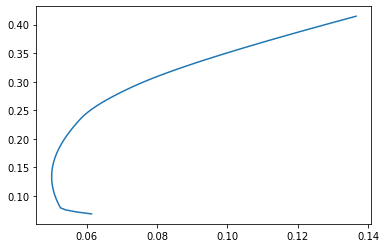

In [ ]:
plt.plot(final_report['volatilities'],final_report['Returns'])

In [ ]:
final_report['volatilities'].min()

0.050103862808807714

#Weights for minimum volatility

In [ ]:
final_report.sort_values(by='volatilities') # point for minimum volatitlity


,Returns,volatilities
19,0.134707,0.050104
18,0.131207,0.050106
20,0.138207,0.050130
17,0.127708,0.050130
21,0.141707,0.050164
...,...,...
95,0.400690,0.128194
96,0.404190,0.130264
97,0.407689,0.132344
98,0.411189,0.134434


In [ ]:
weights_for_min_vol=minimize_vol(0.134707,er[l],cov.loc[l,l])
weights_for_min_vol

array([0.2501136 , 0.22137995, 0.4643264 , 0.06418005])

In [ ]:
risk_free_rate=0.1

In [ ]:
final_report

,Returns,volatilities
0,0.068212,0.061423
1,0.071711,0.057113
2,0.075211,0.054115
3,0.078711,0.052652
4,0.082211,0.052312
...,...,...
95,0.400690,0.128194
96,0.404190,0.130264
97,0.407689,0.132344
98,0.411189,0.134434


In [ ]:
final_report['Sharpe_ratio']=(final_report['Returns']-risk_free_rate)/final_report['volatilities']

In [ ]:
final_report

,Returns,volatilities,Sharpe_ratio
0,0.068212,0.061423,-0.517532
1,0.071711,0.057113,-0.495308
2,0.075211,0.054115,-0.458081
3,0.078711,0.052652,-0.404339
4,0.082211,0.052312,-0.340064
...,...,...,...
95,0.400690,0.128194,2.345581
96,0.404190,0.130264,2.335175
97,0.407689,0.132344,2.324920
98,0.411189,0.134434,2.314819


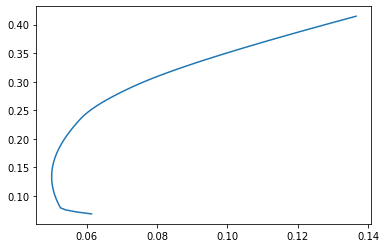

In [ ]:
plt.plot(final_report['volatilities'],final_report['Returns'])

In [ ]:
temp_final_report=final_report.sort_values(by='Sharpe_ratio',ascending=False)

In [ ]:
temp_final_report

,Returns,volatilities,Sharpe_ratio
66,0.299197,0.076085,2.618075
65,0.295697,0.074765,2.617486
67,0.302696,0.077455,2.616961
64,0.292197,0.073498,2.615006
68,0.306196,0.078872,2.614319
...,...,...,...
4,0.082211,0.052312,-0.340064
3,0.078711,0.052652,-0.404339
2,0.075211,0.054115,-0.458081
1,0.071711,0.057113,-0.495308


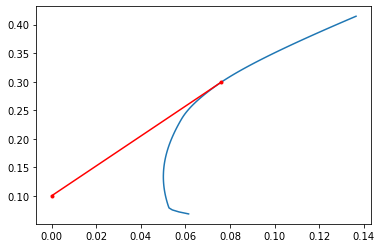

In [ ]:
plt.plot(final_report['volatilities'],final_report['Returns'])
x=[0,temp_final_report['volatilities'][66]]
y=[risk_free_rate,temp_final_report['Returns'][66]]
plt.plot(x,y,'.',c='r')
plt.plot(x,y,c='r')

#Weights for maximum sharpe ratio

In [ ]:
minimize_vol(temp_final_report['Returns'][66],er[l],cov.loc[l,l])

array([0.00000000e+00, 6.03669024e-01, 1.75207071e-16, 3.96330976e-01])

In [ ]:
l

['Smoke', 'Fin', 'Games', 'Coal']

In [ ]:
er['Food']

0.11679867294226098

#Equally weighted portfolio

In [ ]:
er[l]

Smoke    0.107830
Fin      0.223371
Games    0.068212
Coal     0.414689
dtype: float64

In [ ]:
er[l].size

4

In [ ]:
sz=er[l].size
e_w=np.repeat(1/sz,sz)
e_w_vol=portfolio_vol(e_w,cov.loc[l,l])
e_w_ret=portfolio_ret(e_w,er[l])

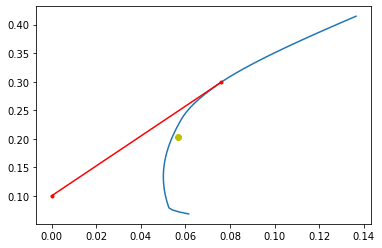

In [ ]:
plt.plot(final_report['volatilities'],final_report['Returns'])
x=[0,temp_final_report['volatilities'][66]]
y=[risk_free_rate,temp_final_report['Returns'][66]]
plt.plot(x,y,'.',c='r')
plt.plot(x,y,c='r')

plt.scatter(e_w_vol,e_w_ret,c='y')

In [ ]:
e_w_ret

0.20352560133756786

In [ ]:
e_w_vol

0.056547630183264266

#Global Minimum Varience Portfolio

In [ ]:
gmv_final_report=final_report.sort_values(by='volatilities')

In [ ]:
gmv_final_report


,Returns,volatilities,Sharpe_ratio
19,0.134707,0.050104,0.692705
18,0.131207,0.050106,0.622823
20,0.138207,0.050130,0.762165
17,0.127708,0.050130,0.552714
21,0.141707,0.050164,0.831416
...,...,...,...
95,0.400690,0.128194,2.345581
96,0.404190,0.130264,2.335175
97,0.407689,0.132344,2.324920
98,0.411189,0.134434,2.314819


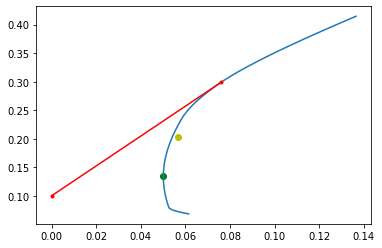

In [ ]:
plt.plot(final_report['volatilities'],final_report['Returns'])
x=[0,temp_final_report['volatilities'][66]]
y=[risk_free_rate,temp_final_report['Returns'][66]]
plt.plot(x,y,'.',c='r')
plt.plot(x,y,c='r')

plt.scatter(e_w_vol,e_w_ret,c='y')
plt.scatter(gmv_final_report['volatilities'][19],gmv_final_report['Returns'][19],c='g')

In [ ]:
weights_for_gmv=minimize_vol(gmv_final_report['Returns'][19],er[l],cov.loc[l,l])

In [ ]:
weights_for_gmv

array([0.25011348, 0.22138086, 0.46432538, 0.06418029])